<a href="https://colab.research.google.com/github/sakshamorsmthidk/Pytorch-tutorial/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [92]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) --> Hidden Layer1 (number of neurons) --> H2 (n) --> output (3 classes of iris flowers)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()  #instantiate our nn.module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [93]:
# Pick a manual seed for randomization
torch.manual_seed(32)
# Create an instance of model
model = Model()

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [96]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [97]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df.head()

<ipython-input-97-b7c499bf9552>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [98]:
# Train Test Split! Set X, y
X = my_df.drop('variety', axis=1).values
y = my_df['variety'].values

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [101]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [102]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer
# lr = learning rate(if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [103]:
# Train our model
# Epochs? (one run through all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the error/loss, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted value vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i%10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propogation: take the error rate of forward propogation and feed it back
  # through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.1699321269989014
Epoch: 10 and loss: 0.9570867419242859
Epoch: 20 and loss: 0.7980871796607971
Epoch: 30 and loss: 0.6327950358390808
Epoch: 40 and loss: 0.43861737847328186
Epoch: 50 and loss: 0.290453165769577
Epoch: 60 and loss: 0.17780695855617523
Epoch: 70 and loss: 0.11584118008613586
Epoch: 80 and loss: 0.0893637090921402
Epoch: 90 and loss: 0.07752915471792221


Text(0.5, 0, 'Epoch')

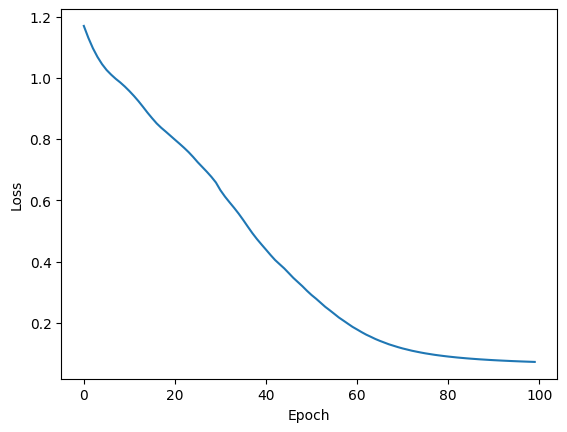

In [104]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [105]:
# Evaluate Model on Test Data Set
with torch.no_grad(): # Turn off back propogation
  y_eval = model.forward(X_test) # X_tests are features from our test set, y__eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [106]:
loss

tensor(0.0538)

In [107]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1:2}. {str(y_val):38} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct!')

 1. tensor([-3.3646,  3.9392,  0.3720])    	 1 	 1
 2. tensor([  7.5572,   1.1015, -11.3347]) 	 0 	 0
 3. tensor([  6.5957,   1.5027, -10.4091]) 	 0 	 0
 4. tensor([-3.3331,  4.2594,  0.0623])    	 1 	 1
 5. tensor([-7.3782,  2.8087,  5.1605])    	 2 	 2
 6. tensor([-7.3760,  3.9013,  4.2826])    	 2 	 2
 7. tensor([  6.1971,   1.6470, -10.0047]) 	 0 	 0
 8. tensor([  6.6383,   1.4348, -10.4031]) 	 0 	 0
 9. tensor([-2.6753,  4.3091, -0.6392])    	 1 	 1
10. tensor([  7.1875,   1.3812, -11.0965]) 	 0 	 0
11. tensor([-3.8318,  4.4027,  0.5246])    	 1 	 1
12. tensor([-8.6807,  1.9994,  6.8923])    	 2 	 2
13. tensor([-2.0678,  3.8200, -0.7571])    	 1 	 1
14. tensor([-1.0768,  4.3741, -2.2838])    	 1 	 1
15. tensor([-7.4965,  2.6207,  5.3287])    	 2 	 2
16. tensor([-8.6136,  1.5508,  7.1186])    	 2 	 2
17. tensor([-3.7761,  3.6462,  0.9487])    	 1 	 1
18. tensor([-6.7608,  2.7754,  4.5281])    	 2 	 2
19. tensor([-1.7048,  4.1980, -1.4670])    	 1 	 1
20. tensor([  7.7757,   1.3740,

In [108]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [109]:
with torch.no_grad():
  print(model(new_iris))

tensor([  6.8839,   1.2461, -10.5586])


In [112]:
newer_iris = torch.tensor([4.9,	3.0,	1.4,	0.2])

In [113]:
with torch.no_grad():
  print(model(newer_iris))

tensor([  6.6096,   1.4040, -10.3353])


In [116]:
# Save our model
torch.save(model.state_dict(), 'iris_model.pt')

In [117]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<ipython-input-117-5cdeecb78af9>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))


<All keys matched successfully>

In [118]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)